# 分类

## 数据集MNIST
Scikit-Learn 提供了许多辅助函数，以便于下载流行的数据集。MNIST 是其中一个。

数据集MNIST，它有着 70000 张规格较小的手写数字图片，由美国的高中生和美国人口调查局的职员手写而成。相当于机器学习当中的“Hello World”，人们无论什么时候提出一个新的分类算法，都想知道该算法在这个数据集上的表现如何。


In [1]:
import pandas as pd
from scipy.io import loadmat#用于加载mat文件
MINIST_ORIGINAL="./datasets/mnist-original.mat"
minist=loadmat(MINIST_ORIGINAL)
minist

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Sun Mar 30 03:19:02 2014',
 '__version__': '1.0',
 '__globals__': [],
 'mldata_descr_ordering': array([[array(['label'], dtype='<U5'), array(['data'], dtype='<U4')]],
       dtype=object),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'label': array([[0., 0., 0., ..., 9., 9., 9.]])}

### 加载数据
数据data，目标label

注意初始格式是784,7000，可以转置

In [2]:
X=pd.DataFrame(minist['data']).T
X

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y=pd.DataFrame(minist['label'])
y

,0,1,2,3,4,5,6,7,8,9,...,69990,69991,69992,69993,69994,69995,69996,69997,69998,69999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


查看数据，图形，照片分类
MNIST 有 70000 张图片，每张图片有 784 个特征。这是因为每个图片都是28\*28像素的，并且每个像素的值介于 0~255 之间。让我们看一看数据集的某一个数字。你只需要将某个实例的特征向量，reshape为28*28的数组，然后使用 Matplotlib 的imshow函数展示出来。

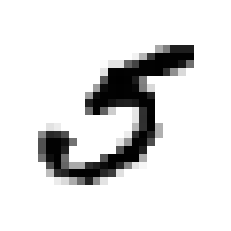

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X.iloc[36000]
some_digit=some_digit.values
some_digit_image =some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

In [5]:
y[36000]

0    5.0
Name: 36000, dtype: float64

### 创建训练集与测试集
MNIST 数据集已经事先被分成了一个训练集（前 60000 张图片）和一个测试集（最后 10000 张图片）
数据先统一转换成ndarray

In [6]:
type(minist['data'])

numpy.ndarray

In [7]:
X=minist['data'].T
X.shape

(70000, 784)

In [8]:
y=minist['label']
y.shape

(1, 70000)

In [9]:
X_train_set,X_test_set=X[:60000],X[60000:]
y_train_set,y_test_set=y[0][:60000],y[0][60000:]
X_train_set

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

打乱训练集。这可以保证交叉验证的每一折都是相似（你不会期待某一折缺少某类数字）。而且，一些学习算法对训练样例的顺序敏感，当它们在一行当中得到许多相似的样例，这些算法将会表现得非常差。打乱数据集将保证这种情况不会发生。

In [10]:
import numpy as np
shuffle_index=np.random.permutation(60000)
X_train_set,y_train_set=X_train_set[shuffle_index],y_train_set[shuffle_index]

转成DataFrame格式
X_train_set,X_test_set,y_train_set,y_test_set=pd.DataFrame(X_train_set),pd.DataFrame(X_test_set),pd.DataFrame(y_train_set),pd.DataFrame(y_test_set)
X_train_set

## 二分类器
现在我们简化一下问题，只尝试去识别一个数字，比如说，数字 5。这个“数字 5 检测器”就是一个二分类器，能够识别两类别，“是 5”和“非 5”。让我们为这个分类任务创建目标向量：

In [11]:
y_train_5=(y_train_set == 5)
y_test_5=(y_test_set == 5)
y_test_5

array([False, False, False, ..., False, False, False])

现在让我们挑选一个分类器去训练它。用随机梯度下降分类器 SGD，是一个不错的开始。使用 Scikit-Learn 的SGDClassifier类。这个分类器有一个好处是能够高效地处理非常大的数据集。这部分原因在于 SGD 一次只处理一条数据，这也使得 SGD 适合在线学习（online learning）。我们在稍后会看到它。让我们创建一个SGDClassifier和在整个数据集上训练它。

In [12]:
from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(random_state=42)
# 开始训练，训练集与目标，二分类器，目标就是bool数组

### 二分类器交叉验证
使用cross_val_score
使用准确率作为指标

In [13]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train_set,y_train_5,cv=3,scoring="accuracy")

array([0.96735, 0.95855, 0.93875])

### 使用混淆矩阵作为指标
对分类器来说，一个好得多的性能评估指标是混淆矩阵。大体思路是：输出类别 A 被分类成类别 B 的次数。举个例子，为了知道分类器将 5 误分为 3 的次数，你需要查看混淆矩阵的第五行第三列。

为了计算混淆矩阵，首先你需要有一系列的预测值，这样才能将预测值与真实值做比较。你或许想在测试集上做预测。但是我们现在先不碰它。（记住，只有当你处于项目的尾声，当你准备上线一个分类器的时候，你才应该使用测试集）。相反，你应该使用cross_val_predict()函数

In [14]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_predict=cross_val_predict(sgd_clf,X_train_set,y_train_5,cv=3)
confusion_matrix(y_train_5,y_train_predict)

array([[52801,  1778],
       [  929,  4492]], dtype=int64)

计算准确率与召回率，f1值（F1 值是准确率和召回率的调和平均。）

In [15]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_predict)

0.7164274322169059

In [16]:
recall_score(y_train_5,y_train_predict)

0.8286294041689725

In [21]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_predict)

0.7684543666067916

## 多分类器
可以使用二分类器分多个类

训练 10 个二分类器，每一个对应一个数字（探测器 0，探测器 1，探测器 2，以此类推）。然后当你想对某张图片进行分类的时候，让每一个分类器对这个图片进行分类，选出决策分数最高的那个分类器。这叫做“一对所有”（OvA）策略（也被叫做“一对其他”）。

Scikit-Learn 可以探测出你想使用一个二分类器去完成多分类的任务，它会自动地执行 OvA（除了 SVM 分类器，它使用 OvO）。

使用准确率与召回率作为指标
### SGDClassifier
使用 Matplotlib 的matshow()函数，将混淆矩阵以图像的方式呈现

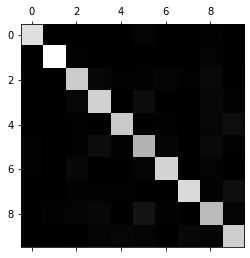

In [23]:
y_train_predict=cross_val_predict(sgd_clf,X_train_set,y_train_set,cv=3)
confusion_matrix=confusion_matrix(y_train_set,y_train_predict)
plt.matshow(confusion_matrix,cmap=plt.cm.gray)
plt.show()


### RandomForestClassifier
随机森林分类器

In [26]:
from sklearn.ensemble import RandomForestClassifier
random_forest=RandomForestClassifier()
y_train_predict=cross_val_predict(random_forest,X_train_set,y_train_set,cv=3)
y_train_predict

array([5., 9., 1., ..., 4., 3., 8.])

手动计算准确率

In [35]:
count=0
for i in range(len(y_train_set)):
    if y_train_predict[i]==y_train_set[i]:
        count+=1

precision_score=count/len(y_train_set)
precision_score

0.9652